<a href="https://colab.research.google.com/github/joaopaulof19/admissao_docentes_ufrn/blob/main/docentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Análise de admissão de docentes no decorrer dos anos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dados_docentes = pd.read_csv('/content/drive/MyDrive/residencia/AMII/docentes.csv', sep=';')

In [ ]:
dados_docentes.head()

,siape,nome,sexo,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,id_unidade_lotacao,lotacao,admissao
0,349938,GILDETE AZEVEDO,F,DESCONHECIDA,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE 1 E 2 GRAUS,C ...,1452,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,1984/08/27 00:00:00.000000000
1,1543339,ADELE GUIMARAES UBARANA SANTOS,F,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,1452,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2006/07/24 00:00:00.000000000
2,1554468,AFRANIO CESAR DE ARAUJO,M,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2008/09/12 00:00:00.000000000
3,1177821,AIRTON FERNANDES GUIMARAES FILHO,M,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,284,ESCOLA DE MÚSICA,1998/04/28 00:00:00.000000000
4,2360824,ALDAIR RODRIGUES DA SILVA,M,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2017/01/25 00:00:00.000000000


In [ ]:
dados_docentes_colunas_interesse = dados_docentes[['admissao', 'sexo']]
dados_docentes_colunas_interesse.head()

,admissao,sexo
0,1984/08/27 00:00:00.000000000,F
1,2006/07/24 00:00:00.000000000,F
2,2008/09/12 00:00:00.000000000,M
3,1998/04/28 00:00:00.000000000,M
4,2017/01/25 00:00:00.000000000,M


In [ ]:
dados_docentes_colunas_interesse['admissao'] = pd.to_datetime(dados_docentes_colunas_interesse['admissao'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_docentes_colunas_interesse.dtypes

admissao    datetime64[ns]
sexo                object
dtype: object

In [ ]:
dados_docentes_colunas_interesse

,admissao,sexo
0,1984-08-27,F
1,2006-07-24,F
2,2008-09-12,M
3,1998-04-28,M
4,2017-01-25,M
...,...,...
2716,2020-11-10,M
2717,2022-05-11,F
2718,2022-01-05,F
2719,2018-07-26,M


In [ ]:
ano = dados_docentes_colunas_interesse['admissao'].dt.year
docentes_sexo = dados_docentes_colunas_interesse['sexo']

df_inner = ano.to_frame().merge(docentes_sexo, how='inner', left_index=True, right_index=True)

df_inner


,admissao,sexo
0,1984,F
1,2006,F
2,2008,M
3,1998,M
4,2017,M
...,...,...
2716,2020,M
2717,2022,F
2718,2022,F
2719,2018,M


# **Análise gráfica**

In [ ]:
docentes_qtd = pd.crosstab(df_inner["admissao"], df_inner["sexo"])
docentes_qtd

sexo,F,M
admissao,,
1972,0,1
1975,0,5
1976,2,7
1977,3,14
1978,4,21
1979,11,12
1980,2,5
1981,4,2
1982,3,2


In [ ]:
docentes_qtd.describe()

sexo,F,M
count,47.000000,47.000000
mean,26.510638,31.382979
std,33.690324,35.584286
min,0.000000,1.000000
25%,3.500000,7.000000
50%,13.000000,19.000000
75%,41.500000,47.000000
max,135.000000,175.000000


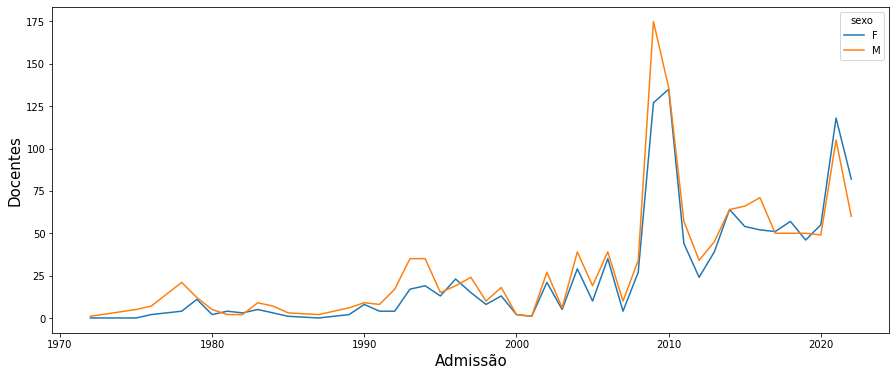

In [ ]:
docentes_qtd.plot.line(subplots=False, figsize=(15,6))
plt.xlabel("Admissão", fontsize = 15)
plt.ylabel("Docentes", fontsize = 15)
plt.show(True)

In [ ]:
teset = df_inner['sexo'].value_counts()
teset

teste  = pd.DataFrame(teset)
teste

,sexo
M,1475
F,1246


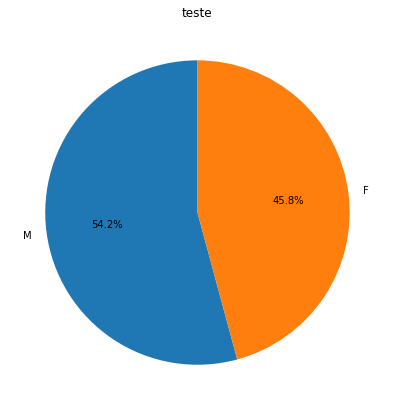

In [ ]:
plt.figure(figsize=(7,7))

plt.pie(x = teste['sexo'], labels=teset.index, shadow=False, startangle=90, autopct= '%1.1f%%')
plt.title('teste')

plt.show()

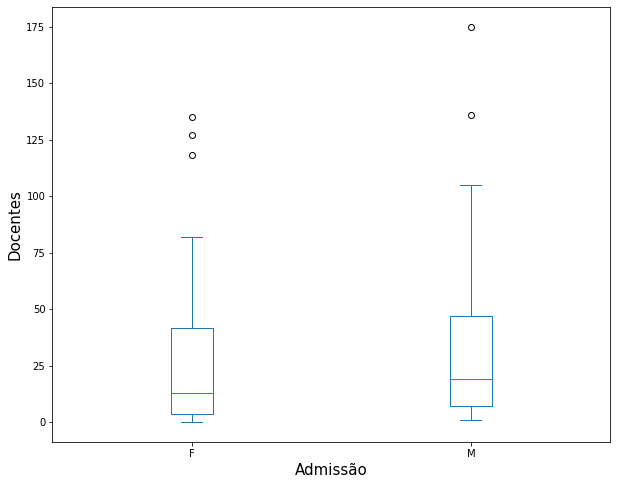

In [ ]:
docentes_qtd.plot.box(figsize=(10, 8))
plt.xlabel("Admissão", fontsize = 15)
plt.ylabel("Docentes", fontsize = 15)
plt.show(True)

In [ ]:
docentes_pct = pd.crosstab(df_inner["admissao"], df_inner["sexo"], normalize="index")
docentes_pct

sexo,F,M
admissao,,
1972,0.000000,1.000000
1975,0.000000,1.000000
1976,0.222222,0.777778
1977,0.176471,0.823529
1978,0.160000,0.840000
1979,0.478261,0.521739
1980,0.285714,0.714286
1981,0.666667,0.333333
1982,0.600000,0.400000


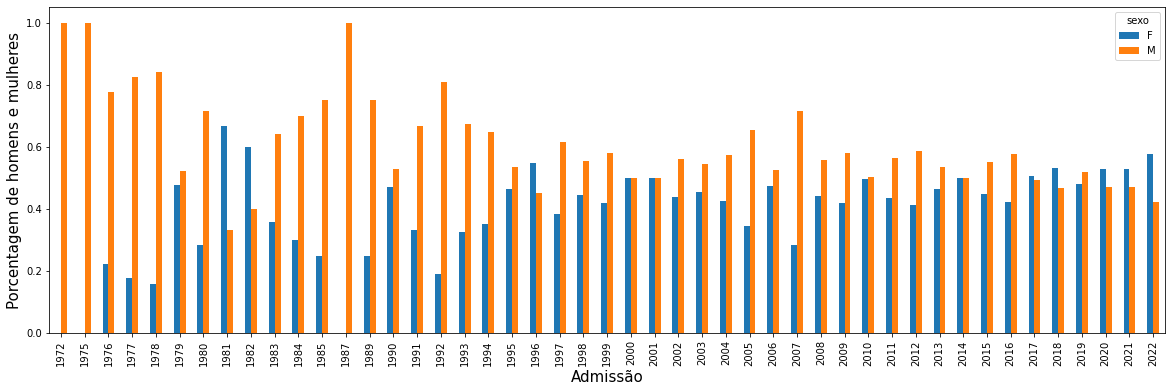

In [ ]:
docentes_pct.plot.bar(rot=90, figsize=(20,6))
plt.xlabel("Admissão", fontsize = 15)
plt.ylabel("Porcentagem de homens e mulheres", fontsize = 15)
plt.show(True)

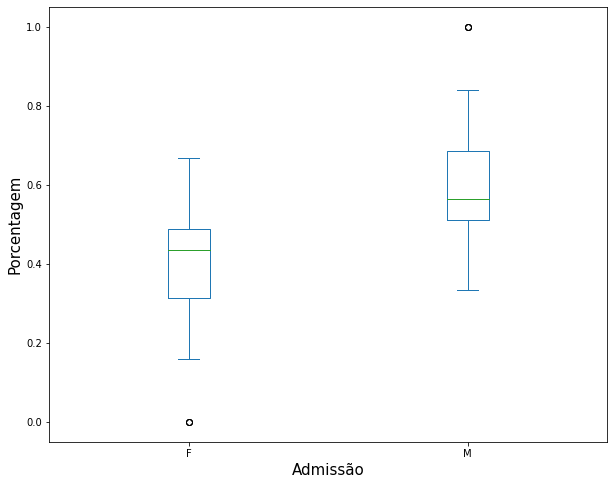

In [ ]:
docentes_pct.plot.box(figsize=(10, 8))
plt.xlabel("Admissão", fontsize = 15)
plt.ylabel("Porcentagem", fontsize = 15)
plt.show(True)

# **Análisando os dados a partir do ano de 1990**

In [ ]:
# teste = df_inner(df_inner.admissao >= 1990)
# teste

qtd_docentes = df_inner.loc[df_inner['admissao'] >= 1990]
qtd_docentes

,admissao,sexo
1,2006,F
2,2008,M
3,1998,M
4,2017,M
5,2009,F
...,...,...
2716,2020,M
2717,2022,F
2718,2022,F
2719,2018,M


In [ ]:
pizza = qtd_docentes['sexo'].value_counts()
teset

teste  = pd.DataFrame(teset)
teste

,sexo
M,1475
F,1246


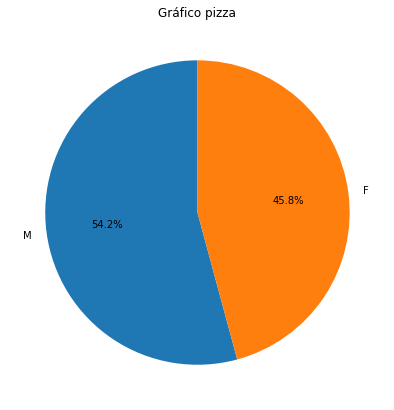

In [ ]:
plt.figure(figsize=(7,7))

plt.pie(x = teste['sexo'], labels=teset.index, shadow=False, startangle=90, autopct= '%1.1f%%')
plt.title('Gráfico pizza')

plt.show()

In [ ]:
dq = pd.crosstab(qtd_docentes["admissao"], qtd_docentes["sexo"])
dq

sexo,F,M
admissao,,
1990,8,9
1991,4,8
1992,4,17
1993,17,35
1994,19,35
1995,13,15
1996,23,19
1997,15,24
1998,8,10


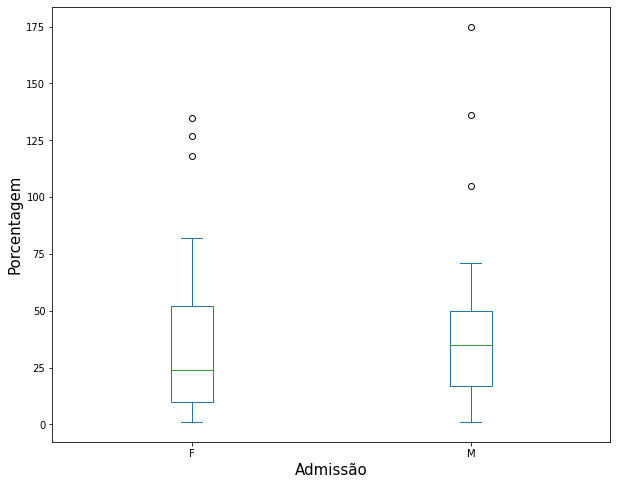

In [ ]:
dq.plot.box(figsize=(10, 8))
plt.xlabel("Admissão", fontsize = 15)
plt.ylabel("Porcentagem", fontsize = 15)
plt.show(True)

In [ ]:
dp = pd.crosstab(qtd_docentes["admissao"], qtd_docentes["sexo"], normalize="index")
dp

sexo,F,M
admissao,,
1990,0.470588,0.529412
1991,0.333333,0.666667
1992,0.190476,0.809524
1993,0.326923,0.673077
1994,0.351852,0.648148
1995,0.464286,0.535714
1996,0.547619,0.452381
1997,0.384615,0.615385
1998,0.444444,0.555556


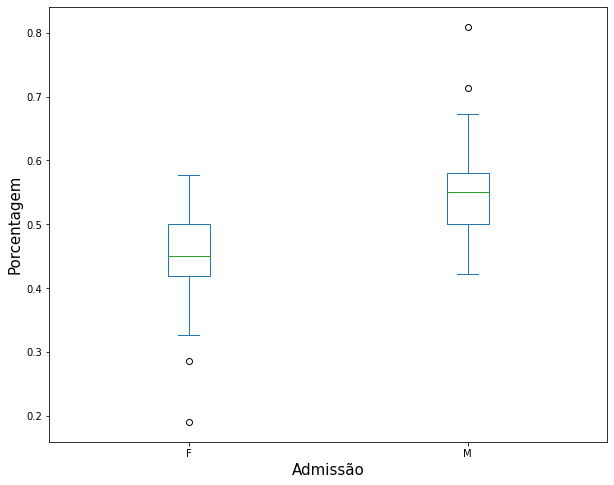

In [ ]:
dp.plot.box(figsize=(10, 8))
plt.xlabel("Admissão", fontsize = 15)
plt.ylabel("Porcentagem", fontsize = 15)
plt.show(True)

In [ ]:
dp.describe()


sexo,F,M
count,33.000000,33.000000
mean,0.441079,0.558921
std,0.081101,0.081101
min,0.190476,0.422535
25%,0.419355,0.500000
50%,0.450000,0.550000
75%,0.500000,0.580645
max,0.577465,0.809524


In [ ]:
dp.dtypes

sexo
F    float64
M    float64
dtype: object

In [ ]:
x = dp.loc[dp['M'] >= 0.809]
x

sexo,F,M
admissao,,
1992,0.190476,0.809524


In [ ]:
x = dp.loc[dp['F'] >= 0.57]
x

sexo,F,M
admissao,,
2022,0.577465,0.422535


# **Outliers**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()

In [ ]:
predicted = pd.Series(clf.fit_predict(dp), name="predicted", index=dp.index)

In [ ]:
X_predicted = pd.concat([dp, predicted], axis=1)
X_predicted

,F,M,predicted
admissao,,,
1990,0.470588,0.529412,1
1991,0.333333,0.666667,-1
1992,0.190476,0.809524,-1
1993,0.326923,0.673077,-1
1994,0.351852,0.648148,1
1995,0.464286,0.535714,1
1996,0.547619,0.452381,1
1997,0.384615,0.615385,1
1998,0.444444,0.555556,1


In [ ]:
X_outliers = X_predicted.query("predicted == -1")
X_outliers

,F,M,predicted
admissao,,,
1991,0.333333,0.666667,-1
1992,0.190476,0.809524,-1
1993,0.326923,0.673077,-1
2007,0.285714,0.714286,-1
2022,0.577465,0.422535,-1


# **Conclusão**

Uma das suposições pensadas para explicar o por que na UFRN admite mais homens do que mulheres, é o fato de ter muitos departamentos que ainda são majoritariamente povoado por pessoas do sexo masculino, como é o caso das engenharias. Para analisar melhor este caso, vamos verificar onde mais ocorreu lotação de discentes.

In [ ]:
lotacao_qtd = dados_docentes['lotacao'].value_counts()
lotacao_qtd


ESCOLA AGRÍCOLA DE JUNDIAÍ                                        118
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                    99
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA                  98
ESCOLA DE MÚSICA                                                   73
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE       69
                                                                 ... 
COORDENAÇÃO DO CURSO DE FÍSICA - A DISTÂNCIA                        1
SECRETARIA DE GOVERNANÇA INSTITUCIONAL                              1
SUPERINTENDÊNCIA DO HUOL - EBSERH                                   1
PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIA E ENGENHARIA DE MATERIAIS      1
INSTITUTO INTERNACIONAL DE FÍSICA                                   1
Name: lotacao, Length: 102, dtype: int64

In [ ]:
lotacao_qtd_pd  = pd.DataFrame(lotacao_qtd)


In [ ]:
lotacao_qtd_pd.head(50)

,lotacao
ESCOLA AGRÍCOLA DE JUNDIAÍ,118
ESCOLA DE CIÊNCIAS E TECNOLOGIA,99
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,98
ESCOLA DE MÚSICA,73
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE,69
DEPARTAMENTO DE ODONTOLOGIA,68
INSTITUTO DE QUÍMICA,58
INSTITUTO METROPOLE DIGITAL,56
DEPARTAMENTO DE LETRAS,55
NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,53
